In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import json

# Read Data Into Pandas DataFrame

In [2]:
with open('train.json','rU') as f:
    data = json.load(f)

In [3]:
cuisines = pd.DataFrame(data)

In [4]:
cuisines.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [27]:
cuisines['ingredient_length']=cuisines.ingredients.apply(len)

In [5]:
cuisines.sort('cuisine')

,cuisine,id,ingredients
1408,brazilian,8015,"[cachaca, pineapple juice, lemon lime beverage]"
10062,brazilian,48040,"[cider vinegar, salt, flat leaf parsley, sugar..."
33999,brazilian,28290,"[water, salt, dried oregano, tofu, paprika, re..."
19408,brazilian,40885,"[bittersweet chocolate, chocolate sprinkles, s..."
34190,brazilian,12614,"[olive oil, collard greens, rib, salt, black p..."
12258,brazilian,23569,"[garlic powder, smoked pork, black beans, baco..."
2908,brazilian,29826,"[ground black pepper, salt, crushed tomatoes, ..."
2780,brazilian,28080,"[bananas, protein powder, honey, vanilla, ice ..."
2944,brazilian,26771,"[dried black beans, bacon slices, pork shoulde..."
2959,brazilian,9398,"[pure vanilla extract, pumpkin purée, unsalted..."


# Study The Data
This initial analysis of the data helps in understanding the data set which reveals facts like data type, shape and uncovers potential roadblocks that may come up while modelling the data. This stage also helps in exploring possibilities of creating new features that may help in the future. It is also a good idea to split the data into training and testing sets and studying these sets to make sure their size is consistent and they contain all cominations of values possible. An initial dry run of the NLP tool helps in catching potential errors that may come up and resolve them early. eg. in this case, count vectorizer was unable to parse a list of ingredients and gave a 'attribute Lower was not found in list'. This uncovered the requirement of converting the datatype of the ingredients column from list to string

In [7]:
cuisines.groupby('cuisine').ingredient_length.mean() #Explore possibility of using length of ingredients as a feature

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: ingredient_length, dtype: float64

In [8]:
cuisines.shape

(39774, 4)

In [9]:
X = cuisines.ingredients

In [10]:
y = cuisines.cuisine

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [12]:
X_train.shape

(29830L,)

In [13]:
X_test.shape

(9944L,)

In [14]:
X_train = X_train.astype('string') #Convert training data into string

In [15]:
X_train.shape

(29830L,)

In [16]:
X_test = X_test.astype('string') #Convert testing data into string

In [17]:
X_test.shape

(9944L,)

In [18]:
vect = CountVectorizer()

In [19]:
X_train_dtm = vect.fit_transform(X_train) #Create a DTM for training

In [20]:
X_test_dtm = vect.transform(X_test) #Create a DTM for testing. A fit operation is not performed on the test data. This ensures that the shape of the test DTM is consistent with the test dataset'

In [21]:
X_test.shape

(9944L,)

In [22]:
X_train.shape

(29830L,)

In [23]:
X_train_dtm.shape

(29830, 2864)

In [24]:
X_test_dtm.shape

(9944, 2864)

In [25]:
vect.get_feature_names() #get a list of the individual words identified

[u'10',
 u'100',
 u'14',
 u'15',
 u'25',
 u'33',
 u'40',
 u'43',
 u'95',
 u'abalone',
 u'abbamele',
 u'absinthe',
 u'abura',
 u'acai',
 u'accent',
 u'accompaniment',
 u'achiote',
 u'acid',
 u'acini',
 u'ackee',
 u'acorn',
 u'acting',
 u'activ',
 u'active',
 u'added',
 u'adobo',
 u'adzuki',
 u'agar',
 u'agave',
 u'age',
 u'aged',
 u'ahi',
 u'aioli',
 u'ajinomoto',
 u'ajwain',
 u'aka',
 u'alaskan',
 u'albacore',
 u'alcohol',
 u'ale',
 u'aleppo',
 u'alexia',
 u'alfalfa',
 u'alfredo',
 u'all',
 u'allspice',
 u'almond',
 u'almondmilk',
 u'almonds',
 u'alphabet',
 u'alum',
 u'amaranth',
 u'amarena',
 u'amaretti',
 u'amaretto',
 u'amba',
 u'amber',
 u'amberjack',
 u'amchur',
 u'american',
 u'aminos',
 u'ammonium',
 u'amontillado',
 u'ampalaya',
 u'anaheim',
 u'anasazi',
 u'ancho',
 u'anchovies',
 u'anchovy',
 u'and',
 u'andouille',
 u'anejo',
 u'angel',
 u'anglaise',
 u'angled',
 u'angostura',
 u'angus',
 u'anise',
 u'anisette',
 u'anjou',
 u'annatto',
 u'any',
 u'aonori',
 u'apple',
 u'apple

In [26]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Function For Implementing Naive Bayes
Implement the model on NLP results that have been produced my using the tool with default settings. 

In [55]:
import seaborn as sns
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)
    conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class),
                            columns=['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese'])
    sns.heatmap(conf_mat.corr())

# Evaluate Model Using Default Count Vectorizer Settings
This reveals some early confusion points which can be easily evaluated by plotting a heat map of the confusion matrix. The heat map creates a matrix of the data that was analyzed and scores the predictions by probability. Sets of predictions can be easily identified based on colors that heatmap assigns


Features:  2864
Accuracy:  0.719831053902


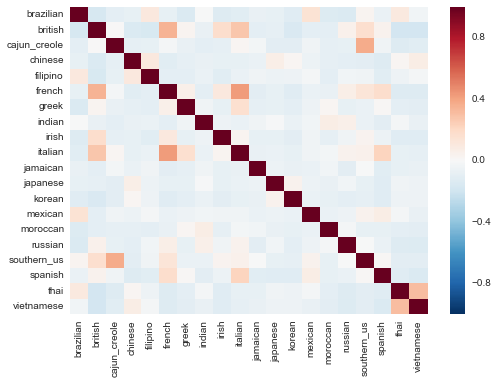

In [28]:
vect = CountVectorizer()
tokenize_test(vect)

# Stop English Words And Evaluate Model
Count vectorizer offers different settings that help tuning the model. Lets stop some common english words. These words may not add a lot of value and may just end up confusing the model. In this case, removing english words is imporving the accuracy of the model. So looks like this is working

Features:  2826
Accuracy:  0.721842316975


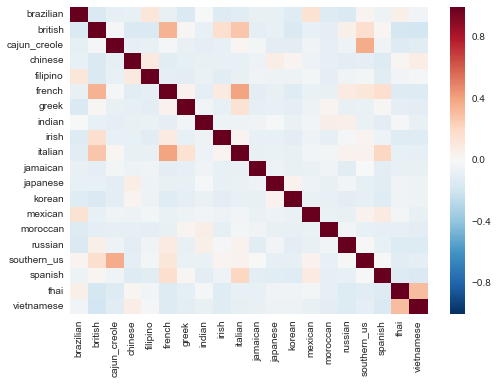

In [29]:
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

# Analyze The Features To Determine Repeating Words
Looks like there is some confusion between some cuisines. This is due to some words that are repeating too often and are confusing our model. Lets study these words better

In [30]:
vect.get_feature_names()

[u'10',
 u'100',
 u'14',
 u'15',
 u'25',
 u'33',
 u'40',
 u'43',
 u'95',
 u'abalone',
 u'abbamele',
 u'absinthe',
 u'abura',
 u'acai',
 u'accent',
 u'accompaniment',
 u'achiote',
 u'acid',
 u'acini',
 u'ackee',
 u'acorn',
 u'acting',
 u'activ',
 u'active',
 u'added',
 u'adobo',
 u'adzuki',
 u'agar',
 u'agave',
 u'age',
 u'aged',
 u'ahi',
 u'aioli',
 u'ajinomoto',
 u'ajwain',
 u'aka',
 u'alaskan',
 u'albacore',
 u'alcohol',
 u'ale',
 u'aleppo',
 u'alexia',
 u'alfalfa',
 u'alfredo',
 u'allspice',
 u'almond',
 u'almondmilk',
 u'almonds',
 u'alphabet',
 u'alum',
 u'amaranth',
 u'amarena',
 u'amaretti',
 u'amaretto',
 u'amba',
 u'amber',
 u'amberjack',
 u'amchur',
 u'american',
 u'aminos',
 u'ammonium',
 u'amontillado',
 u'ampalaya',
 u'anaheim',
 u'anasazi',
 u'ancho',
 u'anchovies',
 u'anchovy',
 u'andouille',
 u'anejo',
 u'angel',
 u'anglaise',
 u'angled',
 u'angostura',
 u'angus',
 u'anise',
 u'anisette',
 u'anjou',
 u'annatto',
 u'aonori',
 u'apple',
 u'apples',
 u'applesauce',
 u'appl

In [31]:
stop = vect.get_stop_words()

In [32]:
stop = list(stop) # create iterable list of stop words

# Find top 20 repeating words
Lets take the top 20 repeating stop words and see what we find. Domain knowledge is always useful in analysis.Little domain knowledge in cooking helps to realize that the top 20 ingredients make sense

In [33]:
from collections import Counter, defaultdict
import seaborn as sns
from nltk.stem.porter import *
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
for index, row in cuisines.iterrows():
    arr = row.ingredients
    for ingredient in row.ingredients:
        total_counter[ingredient] += 1
total_counter.most_common(20)

[(u'salt', 18049),
 (u'olive oil', 7972),
 (u'onions', 7972),
 (u'water', 7457),
 (u'garlic', 7380),
 (u'sugar', 6434),
 (u'garlic cloves', 6237),
 (u'butter', 4848),
 (u'ground black pepper', 4785),
 (u'all-purpose flour', 4632),
 (u'pepper', 4438),
 (u'vegetable oil', 4385),
 (u'eggs', 3388),
 (u'soy sauce', 3296),
 (u'kosher salt', 3113),
 (u'green onions', 3078),
 (u'tomatoes', 3058),
 (u'large eggs', 2948),
 (u'carrots', 2814),
 (u'unsalted butter', 2782)]

# Add Top 10 Common Words To The List Of Stop Words
Lets add these words to the list of stop words

In [34]:
additional_ingredients = ['salt','onion','oliv oil','water','garlic','sugar','garlic','clove','butter','ground','black','pepper','all','purpose','flour']
for i in additional_ingredients:
    stop.append(i)

In [35]:
stop #check list of stop words

['all',
 'six',
 'less',
 'being',
 'indeed',
 'over',
 'move',
 'anyway',
 'four',
 'not',
 'own',
 'through',
 'yourselves',
 'fify',
 'where',
 'mill',
 'only',
 'find',
 'before',
 'one',
 'whose',
 'system',
 'how',
 'somewhere',
 'with',
 'thick',
 'show',
 'had',
 'enough',
 'should',
 'to',
 'must',
 'whom',
 'seeming',
 'under',
 'ours',
 'has',
 'might',
 'thereafter',
 'latterly',
 'do',
 'them',
 'his',
 'around',
 'than',
 'get',
 'very',
 'de',
 'none',
 'cannot',
 'every',
 'whether',
 'they',
 'front',
 'during',
 'thus',
 'now',
 'him',
 'nor',
 'name',
 'several',
 'hereafter',
 'always',
 'who',
 'cry',
 'whither',
 'this',
 'someone',
 'either',
 'each',
 'become',
 'thereupon',
 'sometime',
 'side',
 'two',
 'therein',
 'twelve',
 'because',
 'often',
 'ten',
 'our',
 'eg',
 'some',
 'back',
 'up',
 'go',
 'namely',
 'towards',
 'are',
 'further',
 'beyond',
 'ourselves',
 'yet',
 'out',
 'even',
 'will',
 'what',
 'still',
 'for',
 'bottom',
 'mine',
 'since',
 'p

# Evaluate model by removing stop words

Features:  2814
Accuracy:  0.726971037812


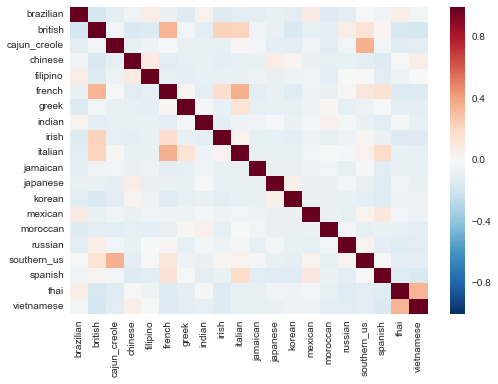

In [36]:
vect = CountVectorizer(stop_words=stop)
tokenize_test(vect)

# Limit features to 2200
max_features is a parameter in count vectorizer that can be use to pick the best features in the document. max_features considers the top features by term frequency. This helps in defining a threshold for highly repeating words and helps the tool consider only the words that matter

Features:  2200
Accuracy:  0.727876106195


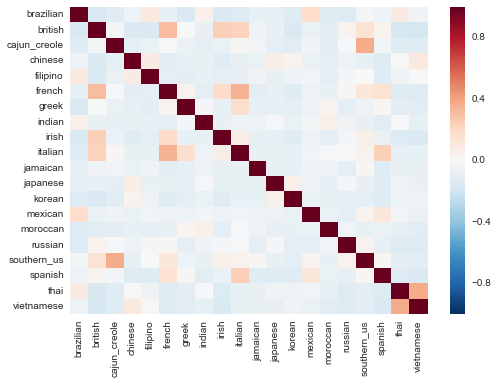

In [37]:
vect = CountVectorizer(stop_words=stop,max_features=2200)
tokenize_test(vect)

# Eliminating errors
Confusion matrix helps us identify areas where the model is making wrong predictions. A good way could be analyzing the error points further

# Many wrong predictions for southern US - Lets examine and remove some words

In [38]:
X_test[y_test == 'southern_us'][:10]

3666     [u'lemon zest', u'whipping cream', u'yellow co...
39221    [u'light brown sugar', u'butter', u'blackberri...
38068    [u'dried thyme', u'onion powder', u'yellow cor...
11519    [u'water', u'bacon slices', u'grits', u'pepper...
2632     [u'whole milk', u'bacon fat', u'eggs', u'heavy...
7205     [u'jalapeno chilies', u'canned tomatoes', u'ce...
92       [u'granulated sugar', u'all-purpose flour', u'...
26118    [u'black pepper', u'salt', u'chicken drumstick...
32264    [u'sugar', u'vanilla extract', u'nectarines', ...
10099    [u'granny smith apples', u'ground cinnamon', u...
Name: ingredients, dtype: object

In [39]:
cuisines.loc[11977:]

,cuisine,id,ingredients,ingredient_length
11977,mexican,24767,"[ground black pepper, large eggs, extra-virgin...",17
11978,japanese,32678,"[red chili powder, bay leaves, salt, oil, grou...",18
11979,italian,30851,"[red bell pepper, balsamic vinegar, fresh basi...",6
11980,italian,37131,"[ground pepper, frozen peas, penne, lemon, coa...",7
11981,thai,41935,"[( oz.) tomato sauce, serrano chilies, gold...",6
11982,southern_us,41324,"[butter, salt, whipping cream, light corn syru...",7
11983,southern_us,45287,"[yoghurt, corn flour, sea salt, vegetable oil,...",6
11984,italian,9275,"[olive oil, crushed red pepper, capers, italia...",10
11985,italian,16023,"[lemon zest, salt, mayonaise, baby spinach, br...",11
11986,mexican,10730,"[flour tortillas, white rice, red bell pepper,...",14


In [40]:
def correct_predictions(cuisine):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    return X_test[(y_test == y_pred_class) & (y_test == '%s'%cuisine)][:10]

In [41]:
correct_predictions('southern_us')

3666     [u'lemon zest', u'whipping cream', u'yellow co...
39221    [u'light brown sugar', u'butter', u'blackberri...
38068    [u'dried thyme', u'onion powder', u'yellow cor...
11519    [u'water', u'bacon slices', u'grits', u'pepper...
92       [u'granulated sugar', u'all-purpose flour', u'...
26118    [u'black pepper', u'salt', u'chicken drumstick...
32264    [u'sugar', u'vanilla extract', u'nectarines', ...
10099    [u'granny smith apples', u'ground cinnamon', u...
11738    [u'shredded sharp cheddar cheese', u'elbow mac...
17856    [u'collard greens', u'apple cider vinegar', u'...
Name: ingredients, dtype: object

In [42]:
def incorrect_predictions():
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    return y_pred_class[60:70] # X_test[y_test!=y_pred_class does not seem to work]

In [43]:
incorrect_predictions() 

array([u'thai', u'mexican', u'southern_us', u'southern_us', u'thai',
       u'chinese', u'italian', u'thai', u'southern_us', u'indian'], 
      dtype='<U12')

In [44]:
y_test[60:70]

15918           thai
35766        mexican
21809        italian
11977        mexican
35111           thai
16995        chinese
14656        spanish
10213           thai
26118    southern_us
8337          indian
Name: cuisine, dtype: object

In [45]:
stop_w = ['bourbon','whiskey','apples','chocolate']

Features:  2860
Accuracy:  0.71922767498


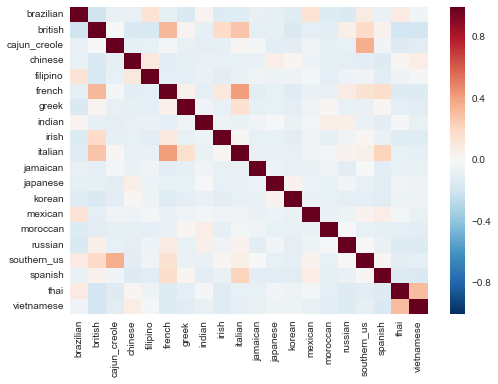

In [46]:
vect = CountVectorizer(stop_words=stop_w)
tokenize_test(vect)

# This does not seem to help

# Implement max features and max_df
max_df helps count vectorizer eliminate words above a defined frequency. After looking at the frequency of repeating words, some further analysis reveals 5000 to be the optimum value for max_df

Features:  2100
Accuracy:  0.727272727273


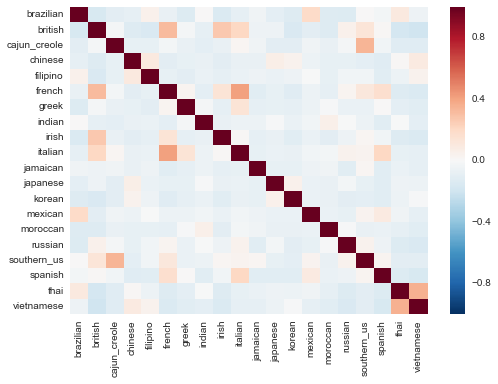

In [47]:
vect = CountVectorizer(max_df=5000,max_features=2100)
tokenize_test(vect)

max_df reduces manual effort of adding stop words

# Add length as a feature
Adding a feature may help since it creates a new distinguishing point. 

In [48]:
feature_cols = ['ingredients','ingredient_length']

In [49]:
X_new = cuisines[feature_cols]

In [50]:
y_new = cuisines.cuisine

In [51]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X_new,y_new,random_state=1)

In [52]:
vect = CountVectorizer(max_df=5000,max_features=2100)
X_new_train_dtm = vect.fit_transform(X_new_train.ingredients.astype('string'))
X_new_test_dtm = vect.transform(X_new_test.ingredients.astype('string'))
print X_train_dtm.shape
print X_test_dtm.shape

(29830, 2864)
(9944, 2864)


In [53]:
X_new_train.drop('ingredients', axis=1).shape

(29830, 1)

In [54]:
extra = sp.sparse.csr_matrix(X_new_train.drop('ingredients', axis=1).astype(float))
extra.shape

(29830, 1)

In [55]:
X_new_train_dtm_extra = sp.sparse.hstack((X_new_train_dtm, extra))
X_new_train_dtm_extra.shape

(29830, 2101)

In [56]:
extra = sp.sparse.csr_matrix(X_new_test.drop('ingredients', axis=1).astype(float))
X_new_test_dtm_extra = sp.sparse.hstack((X_new_test_dtm, extra))
X_new_test_dtm_extra.shape

(9944, 2101)

In [57]:
nb = MultinomialNB()
nb.fit(X_new_train_dtm_extra, y_new_train)
y_pred_class = nb.predict(X_new_test_dtm_extra)
print 'Accuracy: ', metrics.accuracy_score(y_new_test, y_pred_class)
#conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class),
#columns=['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese'])
#sns.heatmap(conf_mat.corr())

Accuracy:  0.7252614642


In [58]:
#Adding length as a feature does not make a difference to the overall accuracy

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_new_train_dtm_extra, y_new_train)
y_pred_class = logreg.predict(X_new_test_dtm_extra)
print 'Accuracy: ', metrics.accuracy_score(y_new_test, y_pred_class)

Accuracy:  0.729686242961


Looks like logistic regression after adding a new feature gives the best result. Adding an extra feature increases the number of features that can be analyzed to make the prediction. Logistic regression performs better than Naive Bayes when it comes to larger datasets. 

# Function to wrap the above
Always a good practice to wrap code in a function. This increases efficiency.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
def tokenize_test_extra(vect):
    X_new_train_dtm = vect.fit_transform(X_new_train.ingredients.astype('string'))
    print 'Features: ', X_new_train_dtm.shape[1]
    X_new_test_dtm = vect.transform(X_new_test.ingredients.astype('string'))
    extra = sp.sparse.csr_matrix(X_new_train.drop('ingredients', axis=1).astype(float))
    X_new_train_dtm_extra = sp.sparse.hstack((X_new_train_dtm, extra))
    extra = sp.sparse.csr_matrix(X_new_test.drop('ingredients', axis=1).astype(float))
    X_new_test_dtm_extra = sp.sparse.hstack((X_new_test_dtm, extra))
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_new_train_dtm_extra, y_new_train)
    y_pred_class = logreg.predict(X_new_test_dtm_extra)
    print 'Accuracy: ', metrics.accuracy_score(y_new_test, y_pred_class)
    conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_class),columns=['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese'])
    sns.heatmap(conf_mat.corr())

Features:  2100
Accuracy:  0.729686242961


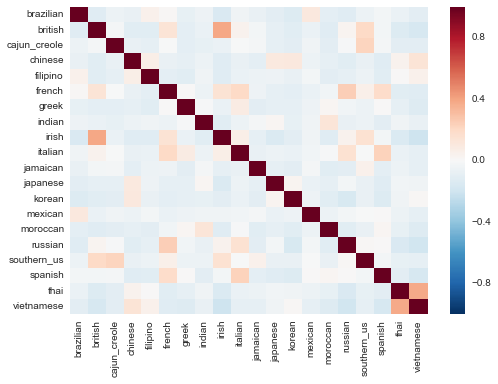

In [61]:
vect = CountVectorizer(max_df=5000,max_features=2100)
tokenize_test_extra(vect)

# Separate at commas - Bag of ingredients instead of bag of words
Count Vectorizer can be tuned to build customized tokens. Maybe treating each original ingredient as a token may help the model. Creating a custom tokenizer can help with this

In [62]:
def my_tokenizer(s):
    return s.replace('[',',').replace(']',',').replace('%',',').split(',')

Features:  8443
Accuracy:  0.668041029767


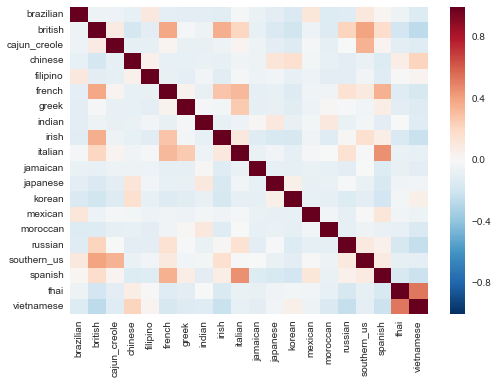

In [63]:
vect = CountVectorizer(tokenizer=my_tokenizer)
tokenize_test_extra(vect)

In [64]:
vect.get_feature_names()

[u'',
 u" 1 inch thick'",
 u" caramel yogurt'",
 u" cook and drain'",
 u" cooked and drained'",
 u" crisp-cooked and crumbled'",
 u" crush'",
 u" cut french into loaf'",
 u" cut into italian loaf'",
 u" cut into serving pieces'",
 u" cut into'",
 u" drain and flake'",
 u" drain'",
 u" drained and chopped'",
 u" fine chop'",
 u" lean ground beef'",
 u" less sodium chicken broth'",
 u" less sodium cooked deli ham'",
 u" less sodium cooked ham'",
 u" less sodium ham'",
 u" less sodium smoked fully cooked ham'",
 u" less sodium taco seasoning mix'",
 u" less sodium taco seasoning'",
 u" low fat cheddar chees'",
 u" low-fat buttermilk'",
 u" low-fat chocolate milk'",
 u" low-fat cottage cheese'",
 u" low-fat milk'",
 u" lowfat greek yogurt'",
 u" milk finely shredded four cheese'",
 u" milk'",
 u" milkfat low fat cottage cheese'",
 u" peel and devein'",
 u" reduced-fat milk'",
 u" rins and drain'",
 u" rins and pat dry'",
 u" skinless chicken breast'",
 u" slice'",
 u" sliced'",
 u" soften'

Features:  2000
Accuracy:  0.66814159292


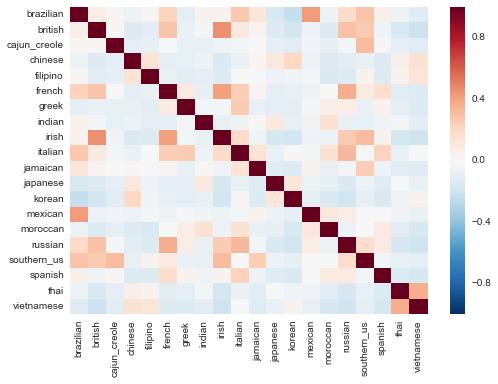

In [65]:
vect = CountVectorizer(tokenizer=my_tokenizer,max_df=5000,max_features = 2000)
tokenize_test_extra(vect)

In [66]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=5000, max_features=2000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function my_tokenizer at 0x0000000026592CF8>,
        vocabulary=None)

This does not seem to work

# Lets try a different vectorizer
tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining.
In this situation, TF-IDF will compute the relative frequency of  a word appearing in a cuisine compared to its frequency across all cuisines. Inverse document frequency is more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). This is proving to be better than count vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

Features:  2200
Accuracy:  0.737228479485


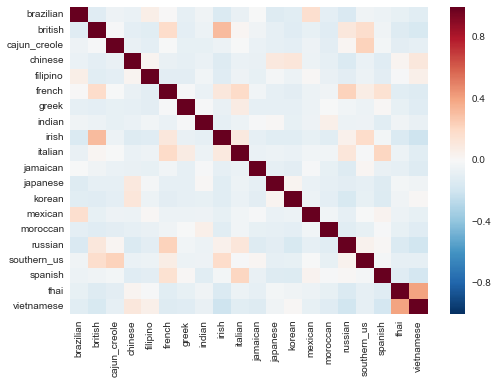

In [68]:
vect = TfidfVectorizer(max_df=5000,max_features=2200)
tokenize_test_extra(vect)

Features:  2200
Accuracy:  0.738636363636


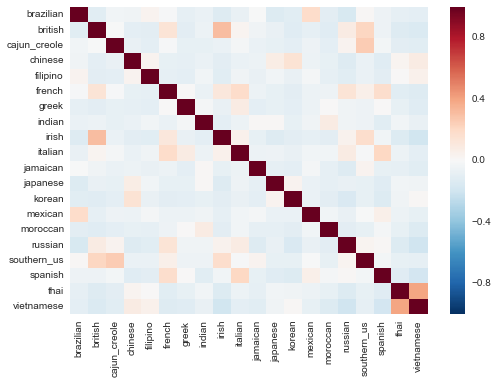

In [69]:
vect = TfidfVectorizer(max_df=5000,max_features=2200,stop_words='english')
tokenize_test_extra(vect)

TF-IDF's method of calculating relative frequency is proving useful here since it is able to understand important ingredients in each cuisine better

# Lets try and improve this. maybe analyzing some bigger errors may help. lets take thai-vietnamese, british-irish, southen_us-cajun_creole 
Taking southern us as a whole did not seem to work. lets take a different approach

In [70]:
thai_vietnamese = cuisines[(cuisines.cuisine == 'thai') | (cuisines.cuisine == 'vietnamese')]

In [71]:
british_irish = cuisines[(cuisines.cuisine == 'british') | (cuisines.cuisine == 'irish')]

In [72]:
sous_cajcre = cuisines[(cuisines.cuisine == 'southern_us') | (cuisines.cuisine == 'cajun_creole')]

In [73]:
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
for index, row in thai_vietnamese.iterrows():
    arr = row.ingredients
    for ingredient in row.ingredients:
        total_counter[ingredient] += 1
total_counter.most_common(20)

[(u'fish sauce', 1017),
 (u'sugar', 674),
 (u'salt', 660),
 (u'garlic', 653),
 (u'water', 537),
 (u'soy sauce', 487),
 (u'vegetable oil', 480),
 (u'garlic cloves', 447),
 (u'shallots', 385),
 (u'fresh lime juice', 383),
 (u'coconut milk', 382),
 (u'green onions', 374),
 (u'carrots', 371),
 (u'lime', 366),
 (u'lemongrass', 328),
 (u'lime juice', 326),
 (u'rice vinegar', 288),
 (u'fresh ginger', 286),
 (u'beansprouts', 279),
 (u'cilantro leaves', 277)]

In [74]:
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
for index, row in british_irish.iterrows():
    arr = row.ingredients
    for ingredient in row.ingredients:
        total_counter[ingredient] += 1
total_counter.most_common(20)

[(u'salt', 783),
 (u'all-purpose flour', 457),
 (u'butter', 441),
 (u'milk', 313),
 (u'sugar', 296),
 (u'eggs', 281),
 (u'unsalted butter', 278),
 (u'onions', 274),
 (u'baking powder', 234),
 (u'water', 205),
 (u'baking soda', 188),
 (u'large eggs', 187),
 (u'potatoes', 185),
 (u'pepper', 175),
 (u'carrots', 164),
 (u'ground black pepper', 137),
 (u'heavy cream', 131),
 (u'flour', 124),
 (u'olive oil', 104),
 (u'vegetable oil', 101)]

In [ ]:
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
for index, row in sous_cajcre.iterrows():
    arr = row.ingredients
    for ingredient in row.ingredients:
        total_counter[ingredient] += 1
total_counter.most_common(20)

# Common elements seem to range from 100 to 3000. Lets limit our features from 100 -1000 and see how our model performs
This will perhaps help us define the threshold of repeating features that are required and not required

100
Features:  100
Accuracy:  0.619670152856
200
Features:  200
Accuracy:  0.692176186645
300
Features:  300
Accuracy:  0.723451327434
400
Features:  400
Accuracy:  0.739038616251
500
Features:  500
Accuracy:  0.749597747385
600
Features:  600
Accuracy:  0.753218020917
700
Features:  700
Accuracy:  0.7541230893
800
Features:  800
Accuracy:  0.753620273532
900
Features:  900


KeyboardInterrupt: 

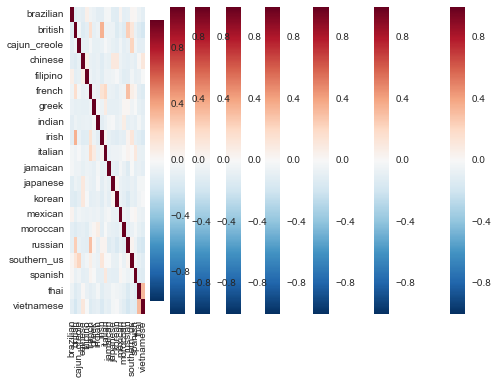

In [76]:
for i in range(100,1000,100):
    print i
    vect = TfidfVectorizer(max_features=i)
    tokenize_test_extra(vect)

# Looks like max_features = 700 is giving a good result. Lets finetune

In [ ]:
#for i in range(700,800,10):
#    print i
#    vect = TfidfVectorizer(max_features=i)
#    tokenize_test_extra(vect)

In [ ]:
#for i in range(600,700,10):
#    print i
#    vect = TfidfVectorizer(max_features=i)
#    tokenize_test_extra(vect)

# Looks like max_features = 770 gives the best result, lets try to tune this

Features:  770
Accuracy:  0.75603378922


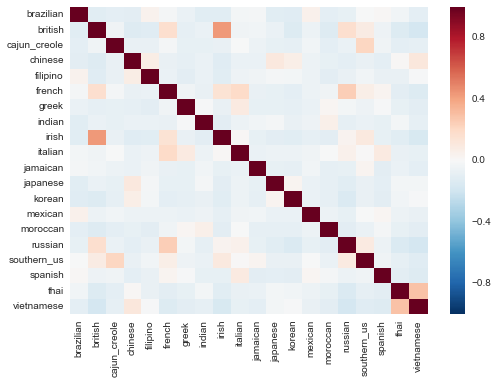

In [89]:
vect = TfidfVectorizer(max_features=770) #So far this is the best accuracy achieved
tokenize_test_extra(vect)

This is proving to be the best model yet

# Lets try implementing the bag of ingredients again

In [ ]:
vect = TfidfVectorizer(max_features=1000,tokenizer=my_tokenizer) #bag of ingredients still does not seem to do very well
tokenize_test_extra(vect)

In [6]:
vect.get_feature_names()

NameError: name 'vect' is not defined

In [16]:
# replacement data. Philadelphia Cream Cheese -> cream cheese
thesauri = {}
with open("thesauri.txt", "r") as f:
    for line in f:
        entry = line.strip().split(",")
        key = entry[0]
        value = entry[1]
        thesauri[key] = value
f.close()

In [17]:
stopwords = []
with open("stopwords.txt", "r") as f:
    for line in f:
        stopwords.append(line.strip())
f.close()

In [20]:
import nltk
nltk.download()
from nltk.stem.porter import *
from nltk import word_tokenize
def clean_ingredients(ingredients):
    stemmer = PorterStemmer()
    new_ingredients = []
    for one in ingredients:
        # if match thesauri, then use its simpler form
        newone = one 
        if one in thesauri:
            newone = thesauri[one]
        # if is not a stop word, then append
        new_ingredients.append(
            " ".join([stemmer.stem(t) for t in word_tokenize(one) if not t in stopwords])
        )
    return new_ingredients

showing info http://www.nltk.org/nltk_data/


In [24]:
# now do it for all observations
cuisines['ingredients_all'] = cuisines.ingredients.apply(lambda x: ",".join(clean_ingredients(x)))

c:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [28]:
cuisines

,cuisine,id,ingredients,ingredients_all,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romain lettuc,black oliv,grape tomato,garlic,p...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomato,ground b...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","egg,pepper,salt,mayonais,cook oil,green chili,...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,veget oil,wheat,salt",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallot,cornflour,cayenn pepper,o...",20
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","plain flour,sugar,butter,egg,fresh ginger root...",12
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...","oliv oil,salt,medium shrimp,pepper,garlic,chop...",13
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...","sugar,pistachio nut,white almond bark,flour,va...",10
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...","oliv oil,purpl onion,fresh pineappl,pork,pobla...",13
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...","chop tomato,fresh basil,garlic,extra-virgin ol...",6


In [49]:
feature_cols = ['ingredients_all','ingredient_length']
X_newer = cuisines[feature_cols]
y_newer = cuisines.cuisine
X_newer_train,X_newer_test,y_newer_train,y_newer_test = train_test_split(X_newer,y_newer,random_state=1)

In [53]:
def tokenize_test_extra_new(vect):
    X_newer_train_dtm = vect.fit_transform(X_newer_train.ingredients_all)#.ingredients_all.astype('string'))
    print 'Features: ', X_newer_train_dtm.shape[1]
    X_newer_test_dtm = vect.transform(X_newer_test.ingredients_all)#.astype('string'))
    extra = sp.sparse.csr_matrix(X_newer_train.drop('ingredients_all', axis=1).astype(float))
    #print X_newer_train_dtm.shape
    #print extra.shape
    X_newer_train_dtm_extra = sp.sparse.hstack((X_newer_train_dtm, extra))
    extra = sp.sparse.csr_matrix(X_newer_test.drop('ingredients_all', axis=1).astype(float))
    X_newer_test_dtm_extra = sp.sparse.hstack((X_newer_test_dtm, extra))
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_newer_train_dtm_extra, y_newer_train)
    y_pred_class = logreg.predict(X_newer_test_dtm_extra)
    print 'Accuracy: ', metrics.accuracy_score(y_newer_test, y_pred_class)
    conf_mat = pd.DataFrame(metrics.confusion_matrix(y_newer_test, y_pred_class),columns=['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese'])
    sns.heatmap(conf_mat.corr())

Features:  770
Accuracy:  0.759151246983


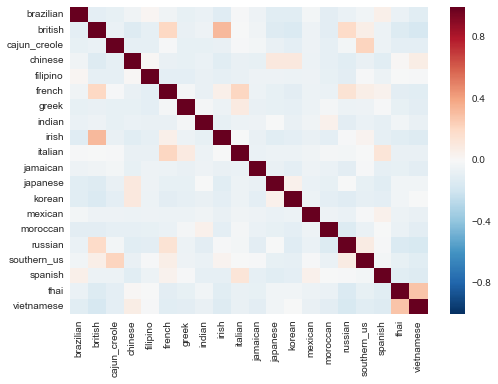

In [58]:
vect = TfidfVectorizer(max_features=770) #So far this is the best accuracy achieved
tokenize_test_extra_new(vect)

In [42]:
X_newer_train

,ingredients_all,ingredient_length
15470,"sugar,rice vinegar,tofu,cook spray,grate orang...",9
24599,"firmli pack brown sugar,brew coffe,all-purpos ...",15
4712,"shorten,dri peach,lard,water,salt,sugar,flour,...",9
8761,"fruit,seed,chia seed,açai,goji berri,slice alm...",9
22503,"red chili pepper,oil,red chili powder,salt,all...",10
9206,"kosher salt,grate parmesan chees,onion,oliv oi...",10
12758,"honey,rice vinegar,soy sauc,green onion,lotu r...",10
31939,"French mustard,gruyer chees,bread",3
34235,"rosemari sprig,larg egg,veget oil,pepper,lemon...",13
5441,"sugar,heavi cream,caramel sauc,ice cream,coca-...",9


In [52]:
y_newer_test

25674          indian
3666      southern_us
27481         italian
36750         chinese
31926         mexican
39221     southern_us
1773         japanese
11188          french
12323         chinese
12045        jamaican
9790           indian
2788          mexican
30245          indian
2187         moroccan
31908           greek
18547      vietnamese
29344         italian
4398           indian
38068     southern_us
10402          french
26283         italian
12903          indian
21950        jamaican
31701       brazilian
27242       brazilian
32926        filipino
21074         italian
30316         chinese
26615    cajun_creole
39713         italian
             ...     
12816         mexican
15736          french
4327     cajun_creole
36368           irish
27670         mexican
35316         mexican
29052          french
29524         italian
1328      southern_us
15799          indian
34647         mexican
17925         mexican
7202          mexican
21938         mexican
12204     